In [1]:
#importing required lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [2]:
#loading the data frame with data from data set
ct_df = pd.read_csv("Country-data.csv")
ct_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#looking at the data types of all variables
ct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
#looking for null values
ct_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#checking for outliers
ct_df.describe(percentiles=[0.2,0.5,0.75,0.9,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
20%,6.320000,22.120000,4.486000,28.020000,2548.000000,1.408000,61.880000,1.630000,1146.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#removing outliers from high income and gdp as these countries seems to be doing well and dont need assistance
#or any kind of aid from external resources.
ct_df=ct_df[ct_df['gdpp']<=48610]
ct_df=ct_df[ct_df['income']<=48290]
ct_df.shape

(153, 10)

In [8]:
#looking at the correlation matrix for all the variables
ct_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.304534,-0.192524,-0.108502,-0.608308,0.274763,-0.881118,0.840771,-0.512642
exports,-0.304534,1.000000,-0.101258,0.644712,0.392301,-0.081014,0.258321,-0.298164,0.227560
health,-0.192524,-0.101258,1.000000,0.171770,0.265106,-0.230747,0.192576,-0.195581,0.416372
imports,-0.108502,0.644712,0.171770,1.000000,-0.011428,-0.254298,-0.007063,-0.133649,-0.052183
income,-0.608308,0.392301,0.265106,-0.011428,1.000000,-0.171574,0.678341,-0.590695,0.911917
inflation,0.274763,-0.081014,-0.230747,-0.254298,-0.171574,1.000000,-0.216404,0.306006,-0.231525
life_expec,-0.881118,0.258321,0.192576,-0.007063,0.678341,-0.216404,1.000000,-0.747826,0.617533
total_fer,0.840771,-0.298164,-0.195581,-0.133649,-0.590695,0.306006,-0.747826,1.000000,-0.492255
gdpp,-0.512642,0.227560,0.416372,-0.052183,0.911917,-0.231525,0.617533,-0.492255,1.000000


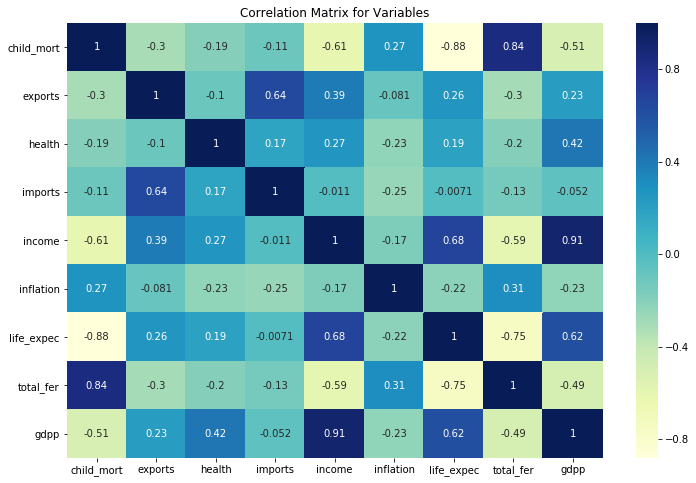

In [9]:
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix for Variables')
sns.heatmap(ct_df.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [10]:
var_col=list(ct_df.drop('country',1).columns)
var_col
con=ct_df.country
con

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
8                             Austria
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
15                            Belgium
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
24                           Bulgaria
25                       Burkina Faso
26                            Burundi
27                           Cambodia
28          

In [11]:
#Scaling the data before we extract PCA
scaler=StandardScaler()
df_sc=scaler.fit_transform(ct_df[var_col])

/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
#converting into DF
df_sc=pd.DataFrame(df_sc,columns=var_col)
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
child_mort    153 non-null float64
exports       153 non-null float64
health        153 non-null float64
imports       153 non-null float64
income        153 non-null float64
inflation     153 non-null float64
life_expec    153 non-null float64
total_fer     153 non-null float64
gdpp          153 non-null float64
dtypes: float64(9)
memory usage: 10.8 KB


In [13]:
#creating Prinicple Components
pca=PCA(random_state=100)
pca.fit(df_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
#looking at the eigen vectors/PCAs
pca.components_

array([[ 0.43076815, -0.21664577, -0.17896568, -0.09305539, -0.42232342,
         0.18670872, -0.43098768,  0.41425719, -0.39527051],
       [ 0.03427865,  0.59436092, -0.08712022,  0.72620846, -0.13021709,
        -0.17490075, -0.13851976,  0.00284138, -0.20940116],
       [-0.16572296,  0.28815994, -0.72552468, -0.18060048,  0.074002  ,
         0.51079859,  0.18285274, -0.11853149, -0.12892176],
       [ 0.31833712,  0.29047628,  0.25917194,  0.06073961,  0.38875665,
         0.52057774, -0.17949589,  0.32796584,  0.42604264],
       [-0.26417498, -0.12012682,  0.49396026,  0.21079908, -0.28870852,
         0.61510498,  0.16083436, -0.22001594, -0.30226923],
       [ 0.19990318, -0.03096955, -0.01526009, -0.05450979,  0.13084378,
         0.06701647, -0.60385717, -0.75460227,  0.01400194],
       [ 0.03544262, -0.61984858, -0.34498178,  0.6095754 ,  0.07542472,
         0.13531568,  0.04772309, -0.00952672,  0.31236116],
       [ 0.74209944,  0.06738494,  0.01964862, -0.00420296, -0

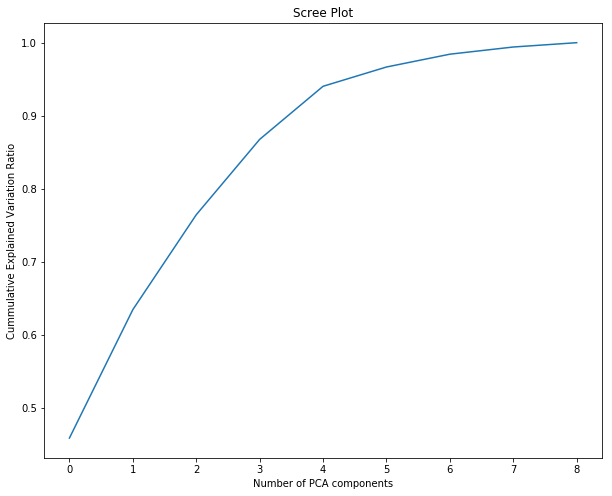

In [80]:
#plotting Scree graph
var_ratio=pca.explained_variance_ratio_
var_cum=np.cumsum(var_ratio)
plt.figure(figsize=(10,8))
plt.title('Scree Plot')
plt.xlabel('Number of PCA components')
plt.ylabel('Cummulative Explained Variation Ratio')
plt.plot(var_cum)
plt.show()

In [16]:
#by looking at the graph we can 95% of the variance in the data
#is explained by 5 PCAs

#transforming data to PCAs
pca2=PCA(n_components=5,random_state=100)
pc_data=pca2.fit_transform(df_sc)

In [17]:
#creating Df for PCAs
df_pc=pd.DataFrame(pc_data,columns=['PC1','PC2','PC3','PC4','PC5'])
df_pc.head()

,PC1,PC2,PC3,PC4,PC5
0,2.866075,-0.325729,-1.230340,0.346070,-0.072308
1,-0.655924,-0.125447,0.099298,-1.219038,0.529285
2,0.005453,-0.571431,1.505152,-0.361541,0.160933
3,2.857190,0.873165,1.405091,1.650288,-0.930353
4,-1.460498,0.525735,0.218052,-0.509000,-0.195090


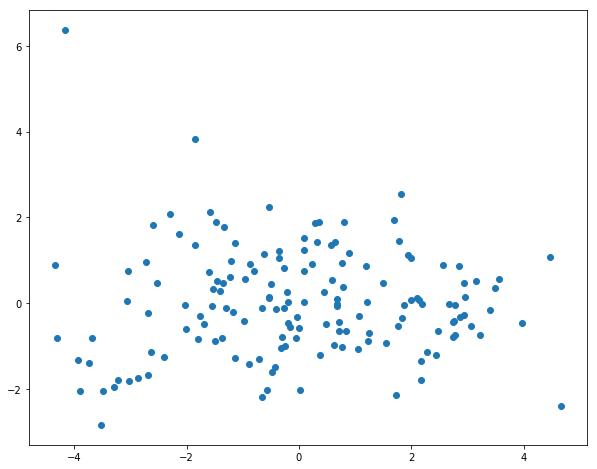

In [18]:
#looking at the eigen vectors
#PC1 and PC2 variance explaination
plt.figure(figsize=(10,8))
plt.scatter(df_pc['PC1'],df_pc['PC2'])
plt.show()
# we can see most of the variance is explained in PC1 and PC2

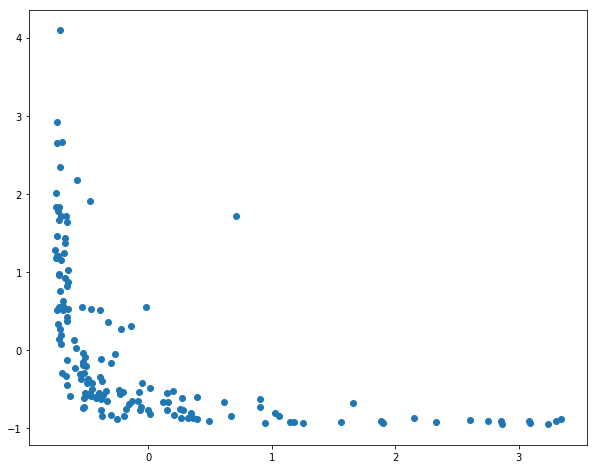

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(df_sc['gdpp'],df_sc['child_mort'])
plt.show()

In [20]:
#looking at hopkins stat to see if the data is good for clustering
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(df_pc)
#hopiks score looks good, so we are good to cluster the data

0.7525450218289372

In [22]:
#looking for apt number of clusters for K-Means clustering
# measuring silhouette_score and ploting elbow graph to decide on number of clusters
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df_pc)
    slh_src=silhouette_score(df_pc,kmeans.labels_)
    ssd.append(kmeans.inertia_)
    print(num_clusters,round(slh_src,2))

2 0.3
3 0.31
4 0.26
5 0.27
6 0.27
7 0.25
8 0.26
9 0.26


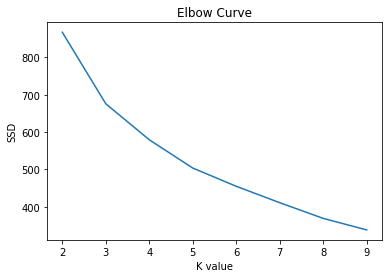

In [82]:
#elbow plot
plt.plot(range_n_clusters,ssd)
plt.title('Elbow Curve')
plt.xlabel('K value')
plt.ylabel('SSD')
plt.show()

In [24]:
#by looking at the silhouette_score and ploting elbow graph we see the number of clusters apt for kmeans 
#clustering is 3
# we will be clustering the data into three clusters
kmean=KMeans(n_clusters=3,max_iter=50,random_state=100)
kmean.fit(df_pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [25]:
#looking at the clustering labels
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0],
      dtype=int32)

In [26]:
#adding contry and cluster labels to PCA data Frame
df_pc['country']=con
df_pc['cluster_id']=kmean.labels_
df_pc.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,2.866075,-0.325729,-1.230340,0.346070,-0.072308,Afghanistan,0
1,-0.655924,-0.125447,0.099298,-1.219038,0.529285,Albania,1
2,0.005453,-0.571431,1.505152,-0.361541,0.160933,Algeria,1
3,2.857190,0.873165,1.405091,1.650288,-0.930353,Angola,0
4,-1.460498,0.525735,0.218052,-0.509000,-0.195090,Antigua and Barbuda,1


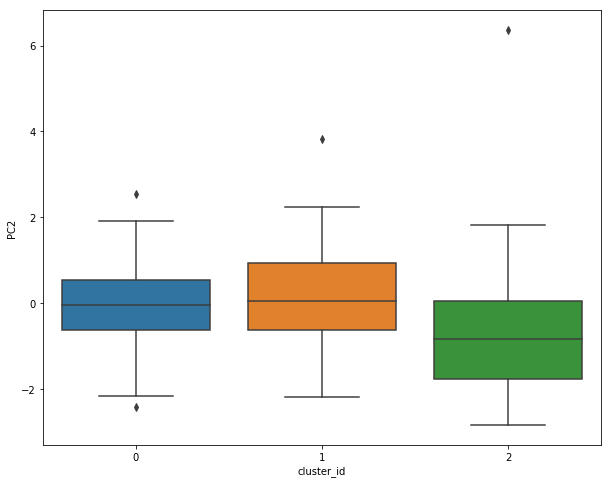

In [27]:
#looking at the distribution of each PCA across clusters
plt.figure(figsize=(10,8))
#y=PC1,PC2,PC3
sns.boxplot(x='cluster_id',y='PC2',data=df_pc)
plt.show()

In [28]:
#assinging the clustering labels to original data set
ct_df['kmean_cluster_id']=kmean.labels_
ct_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


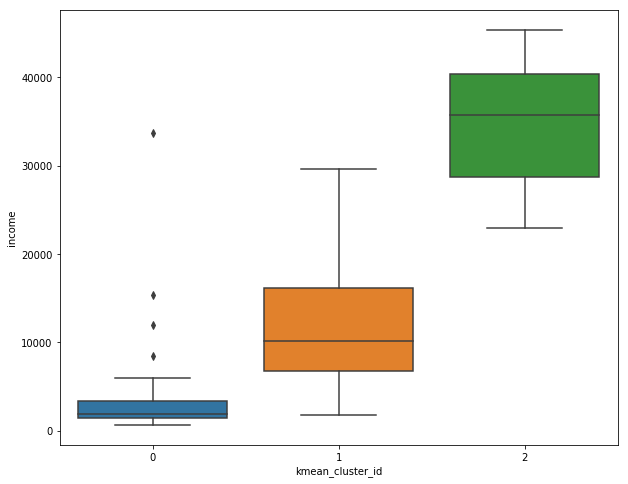

In [29]:
#looking at the distribution of variable accross the clusters
plt.figure(figsize=(10,8))
sns.boxplot(x='kmean_cluster_id',y='income',data=ct_df)

#there is distinct means of income across the clusters

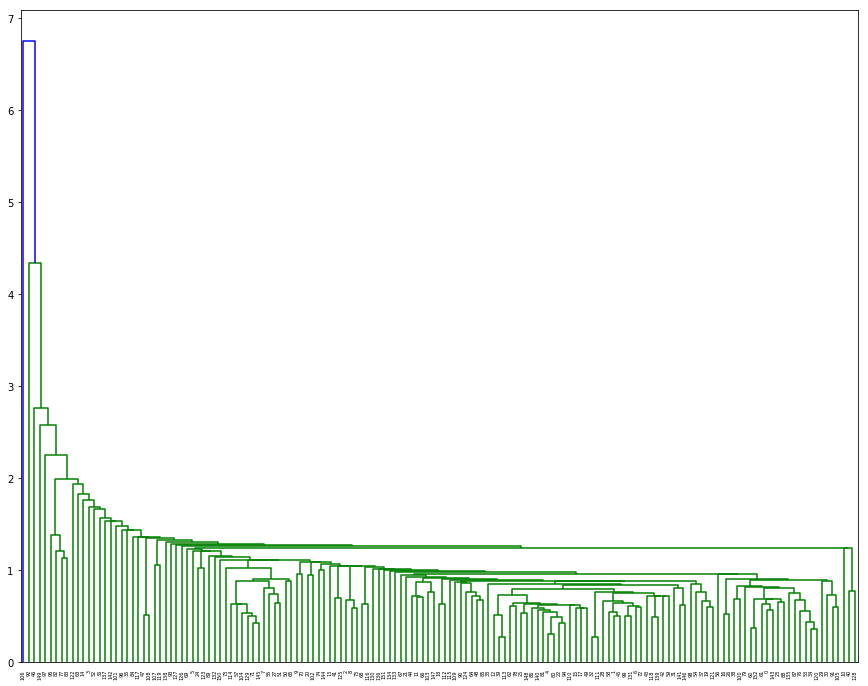

In [30]:
#Applying hierarchical clustering
#looking at the dendogram for single linkage
pc=['PC1','PC2','PC3','PC4','PC5']
merging=linkage(df_pc[pc],method='single',metric='euclidean')
plt.figure(figsize=(15,12))
dendrogram(merging)
plt.show()

In [31]:
cluster_sin_lable=cut_tree(merging,n_clusters=3).reshape(-1,)
cluster_sin_lable

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
# we can clearly see there are two outliers that is effecting the clustering and data balance across the clusters
#we will try to removdd these outloers one by one and see we can get clear clusters
ct_df['cluster_sin_lable']=cluster_sin_lable

In [33]:
ct_df[ct_df['cluster_sin_lable']!=0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_id,cluster_sin_lable
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,2,1
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,0,2


In [34]:
#Looking the gdpp and income we can conclude that Malta is developing country that needs no aid 
#where as Nigeria seems to be doing bad at child mortality
# we will remove Malta and see if we can form clusters without outliers
ct_df=ct_df[ct_df['country']!='Malta']
df_pc=df_pc[df_pc['country']!='Malta']

In [35]:
df_pc.shape

(152, 7)

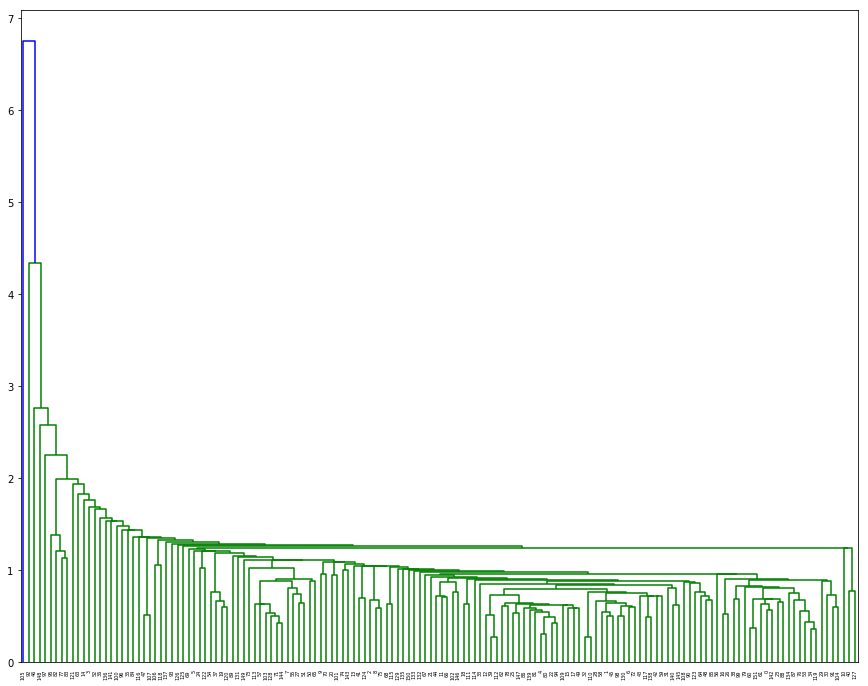

In [36]:
merging=linkage(df_pc[pc],method='single',metric='euclidean')
plt.figure(figsize=(15,12))
dendrogram(merging)
plt.show()

In [39]:
cluster_sin_lable=cut_tree(merging,n_clusters=3).reshape(-1,)
cluster_sin_lable
#still looks the same

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

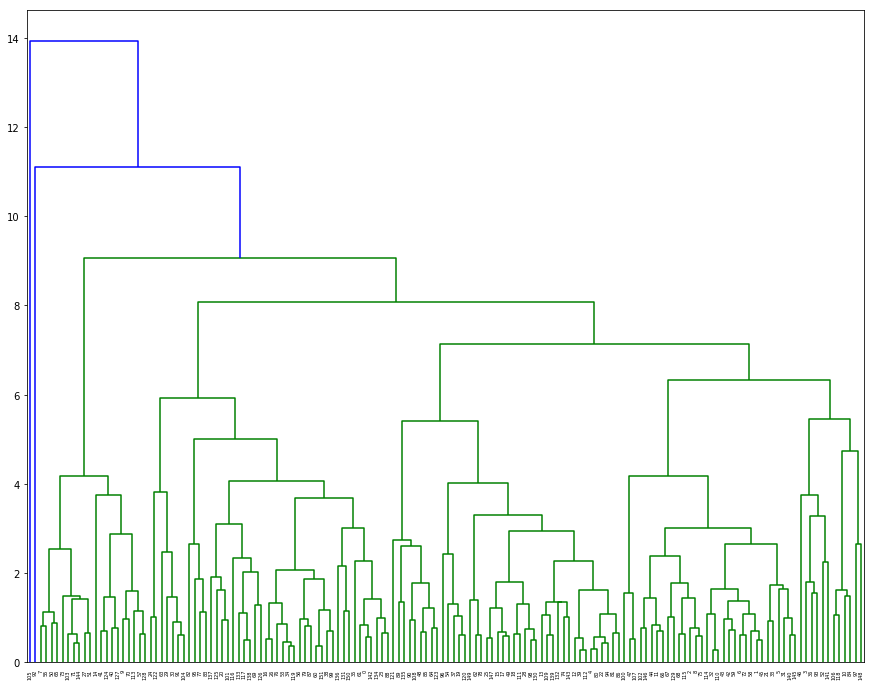

In [40]:
#now let us look at complete linkage
merging=linkage(df_pc[pc],method='complete',metric='euclidean')
plt.figure(figsize=(15,12))
dendrogram(merging)
plt.show()

In [74]:
#the plot looks better, now let us cut the tree for 3 clusters
cluster_complete_lable=cut_tree(merging,n_clusters=3).reshape(-1,)
cluster_complete_lable

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
#By looking at the plot, we can try cutting the tree at 5 clusters and how it turns out
cluster_complete_lable=cut_tree(merging,n_clusters=5).reshape(-1,)
cluster_complete_lable

array([0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 4, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [42]:
#the clusters seems to be looking good
ct_df['cluster_complete_lable']=cluster_complete_lable

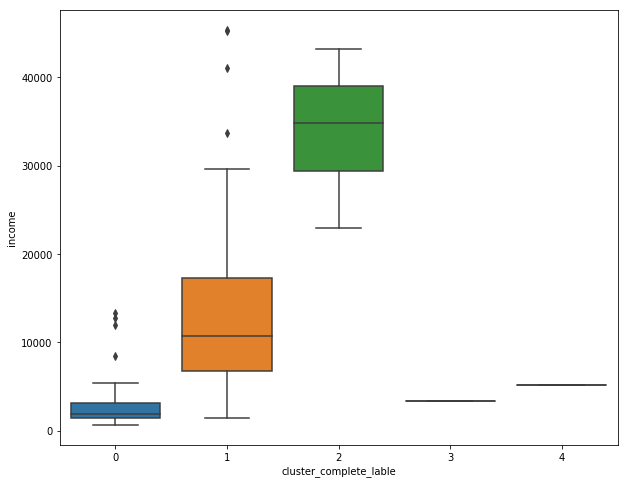

In [43]:
#looking at the distribution of variable accross the clusters
plt.figure(figsize=(10,8))
sns.boxplot(x='cluster_complete_lable',y='income',data=ct_df)

#there is distinct means of income across the clusters

In [44]:
ct_df[(ct_df['cluster_complete_lable']==3) | (ct_df['cluster_complete_lable']==4)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_id,cluster_sin_lable,cluster_complete_lable
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1200,0,0,3
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,0,2,4


In [45]:
#if we look at the mean incoome accross the clusters the countries in cluster are under-developer/poor countries.
poor_con=ct_df[(ct_df['cluster_complete_lable']==0)]

In [46]:
poor_con.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_id,cluster_sin_lable,cluster_complete_lable
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.0
mean,85.702273,25.680000,7.054545,46.004545,2934.386364,8.425795,59.640909,4.840227,1450.863636,0.159091,0.0,0.0
std,39.232553,11.872169,2.478793,18.395525,3050.720138,6.509603,7.228475,1.207351,1637.433139,0.369989,0.0,0.0
min,17.200000,2.200000,3.770000,17.200000,609.000000,0.885000,32.100000,1.270000,231.000000,0.000000,0.0,0.0
25%,62.200000,16.725000,5.152500,33.975000,1380.000000,3.412500,56.450000,4.262500,551.500000,0.000000,0.0,0.0
50%,82.050000,23.300000,6.395000,43.100000,1835.000000,6.600000,59.050000,5.035000,763.500000,0.000000,0.0,0.0
75%,109.500000,35.750000,8.512500,52.050000,3115.000000,12.150000,64.150000,5.462500,1347.500000,0.000000,0.0,0.0
max,208.000000,50.600000,13.100000,101.000000,13300.000000,26.500000,71.500000,7.490000,7280.000000,1.000000,0.0,0.0


In [47]:
poor_con[(poor_con['income']<1500)&(poor_con['gdpp']<1000)&(poor_con['child_mort']>100)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_id,cluster_sin_lable,cluster_complete_lable
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,0,0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0,0,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,0,0,0
63,Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648,0,0,0
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,0,0,0
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419,0,0,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0,0,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0,0,0


In [68]:
#By choosing Kmean-clusters, lets divide the coutries into: which also help us for a better business approach 
# 1.Under-Developing
# 2.Developing
# 3.Developed 

df_ud=ct_df[(ct_df['kmean_cluster_id']==0)]
df_dv=ct_df[(ct_df['kmean_cluster_id']==1)]
df_d=ct_df[(ct_df['kmean_cluster_id']==2)]

df_ud_pc=df_pc[(df_pc['cluster_id']==0)]
df_dv_pc=df_pc[(df_pc['cluster_id']==1)]
df_d_pc=df_pc[(df_pc['cluster_id']==2)]

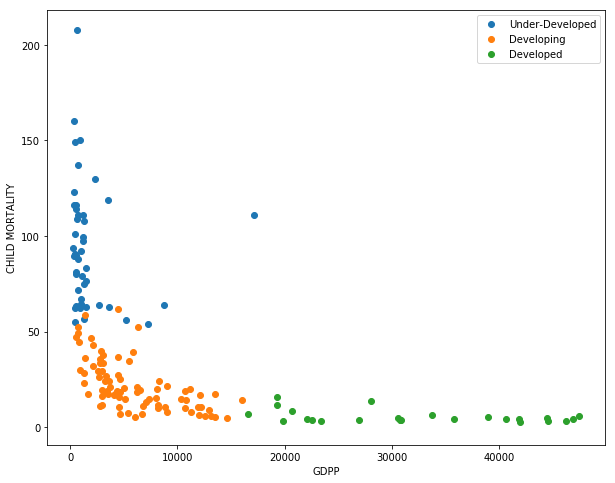

In [69]:
#Scatter plot between GDP and Child Mortality across the clusters
plt.figure(figsize=(10,8))
plt.scatter(df_ud['gdpp'],df_ud['child_mort'])
plt.scatter(df_dv['gdpp'],df_dv['child_mort'])
plt.scatter(df_d['gdpp'],df_d['child_mort'])
plt.xlabel('GDPP')
plt.ylabel('CHILD MORTALITY')
plt.legend(['Under-Developed','Developing','Developed'])
plt.show()

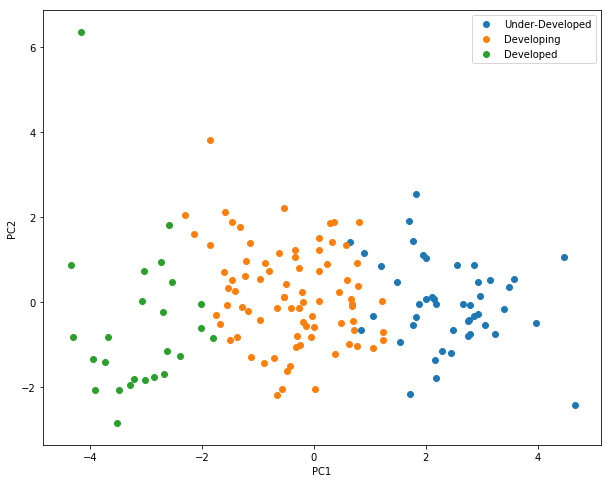

In [73]:
#Scatter plot between PC1 and PC2 across the clusters
plt.figure(figsize=(10,8))
plt.scatter(df_ud_pc['PC1'],df_ud_pc['PC2'])
plt.scatter(df_dv_pc['PC1'],df_dv_pc['PC2'])
plt.scatter(df_d_pc['PC1'],df_d_pc['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Under-Developed','Developing','Developed'])
plt.show()

In [74]:
#Lets look at the countries that needs aid immediately in under-developed countries
criteria=['income','gdpp','child_mort','health']
df_ud[criteria].describe()

,income,gdpp,child_mort,health
count,46.000000,46.000000,46.000000,46.000000
mean,3543.760870,1749.782609,94.439130,6.206957
std,5359.622604,2887.629200,32.377966,2.733487
min,609.000000,231.000000,53.700000,1.970000
25%,1390.000000,548.500000,65.000000,4.487500
50%,1860.000000,833.000000,90.250000,5.260000
75%,3357.500000,1310.000000,111.000000,7.632500
max,33700.000000,17100.000000,208.000000,13.100000


In [75]:
#coutries that need aid
con_aid=df_ud[(df_ud['child_mort']>100)&(df_ud['income']<3540)&(df_ud['gdpp']<1749)]
con_aid.shape

(14, 13)

In [88]:
df_fin=con_aid[criteria+['country']].sort_values(by=['income','gdpp'],ascending=True)
df_fin

,income,gdpp,child_mort,health,country
37,609,334,116.0,7.91,"Congo, Dem. Rep."
112,814,348,123.0,5.16,Niger
31,888,446,149.0,3.98,Central African Republic
106,918,419,101.0,5.21,Mozambique
63,1190,648,109.0,4.93,Guinea
132,1220,399,160.0,13.10,Sierra Leone
64,1390,547,114.0,8.50,Guinea-Bissau
25,1430,575,116.0,6.74,Burkina Faso
66,1500,662,208.0,6.91,Haiti
17,1820,758,111.0,4.10,Benin


In [87]:
df_fin['country'][:5]

37             Congo, Dem. Rep.
112                       Niger
31     Central African Republic
106                  Mozambique
63                       Guinea
Name: country, dtype: object

In [83]:
#Countries That will be reciving the aid in PHASE-1
#There two more countries that have very high child Mortality rate and low life expectancy 
#that need aid from our organisation
list_con=['Congo, Dem. Rep.','Niger','Central African Republic','Mozambique','Guinea','Haiti','Chad']
list_con

['Congo, Dem. Rep.',
 'Niger',
 'Central African Republic',
 'Mozambique',
 'Guinea',
 'Haiti',
 'Chad']